# Imports

All we need is numpy and matplotlib!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will be making a fully connected network with no hidden layers, which is often referred to as a single-layer perceptron. In this network architecture, every input node is directly connected to every output node without any intermediate (hidden) layers.

It's important to note that a single-layer perceptron can only learn linearly separable patterns. In other words, it can only classify data that can be separated by a straight line or a hyperplane. For more complex tasks that require non-linear decision boundaries, multiple layers (again, hidden layers) and more sophisticated network architectures are necessary.

Below is an example of the single layer perceptron we will be making:

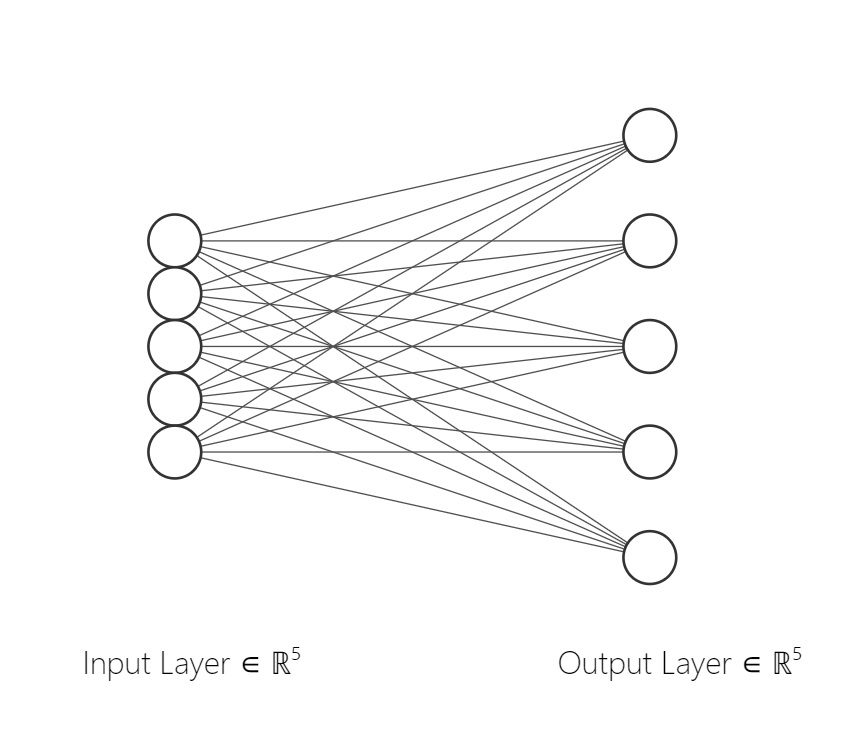


# Image Vector - Obtaining an Image
Since 2D and 3D images hurt my brain, let's make a random one dimensional image

[2. 0. 0. 1. 0.]


(5,)

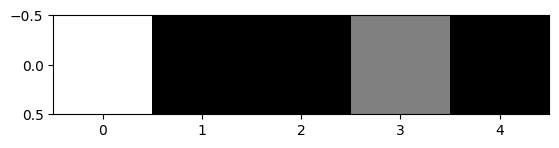

In [2]:
### Defining input vector
input_vector = np.array([2, 0, 0, 1, 0], dtype=np.float32)

print(input_vector)
plt.imshow(np.expand_dims(input_vector, 0), cmap='gray')

# Outputs (5,), which means this vector has 5 rows and "zero" columns
input_vector.shape

# Label Vector
The label for our input vector is also known as the "ground truth". For a binary segmentaion algorithm which will be the focus of this example, this array will be just that - binary. Let's go ahead and binarize this input image and call it `ground_truth`

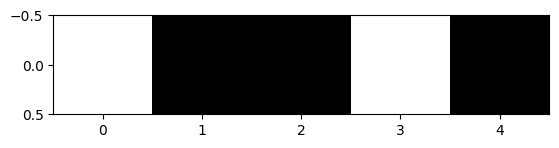

In [3]:
ground_truth = np.asarray(input_vector)
ground_truth[ground_truth > 0] = 1

plt.imshow(np.expand_dims(ground_truth, 0), cmap='gray')

# Network Weights - Wait, What?
* Network weights are usually generated at random, and are ALWAYS generated before network training. This is called "initializing the weights" of the network. Since this is done randomly, I'll just use numpy's handy-dandy `random.uniform` function.

* For this single dimension example, the weights will be a 2D matrix. The jth column of the matrix corresponds to the jth element in the output vector

* let's say the image we want to segment has `n=5` number of rows. This means every single column of the weights matrix needs to have `n=5` number of rows in it - because to do a dot product, the vectors need to have the same exact shape.

* If we are just doing image segmentation, the input and the output matricies will be the same shape because if they were different, the output would only be a segmentation of "part" of the image. Therefore, the number of columns we need to have in our weights matrix is 5 because we want our network to output 5 numbers for each element in the output vector. Therefore, we need a matrix of size `nxn`, such that `n=5`

In [4]:
n = input_vector.shape[0]

weights_matrix = np.random.uniform(0, 1, size=(n, n))
print(weights_matrix)

[[0.23319865 0.50542257 0.54436392 0.96171427 0.1140698 ]
 [0.13157764 0.94307923 0.93883441 0.79451332 0.91983988]
 [0.89130969 0.09421524 0.63153934 0.04828749 0.19798562]
 [0.54523103 0.23198903 0.35756402 0.56162185 0.9561423 ]
 [0.02823716 0.6499903  0.00660496 0.97302309 0.94720773]]


# Activation and prediction functions

## Activation Function - Sigmoid
Yep, that's it. For us we're literally just going to use a sigmoid function

In [5]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

## Prediction Function - Fancy Sigmoid

This whole "prediction function" isn't an actual term, but I just wrote it to make the predictions less cumbersome

In [6]:
def predict(input_vector, weights_matrix):
    '''Uses a weight matrix containing n rows to predict on an input vector of shape (n,). Returns a normalized output vector of shape (n,)'''
   
    output = np.zeros(input_vector.shape)   # Making an empty vector that is congruent to the shape of the input vector,
                                            # we will fill in each element of this vector individually, as each dot product is calculated
    
    # iterating through each row of the weights matrix
    for row in range(len(weights_matrix)):

        # Calculating the contribution of each input and weight to the corresponding output
        dot_product = np.dot(input_vector, weights_matrix[row])

        # Moving the output to its corresponding place in the output vector
        output[row] = sigmoid(dot_product)

    return output

# Predicticting before training
I know we haven't done any training yet, so there should be no reason for our network to know what we're detecting (I don't even know what we're detecting yet lol), but let's just see what this network does just for benchmarking.

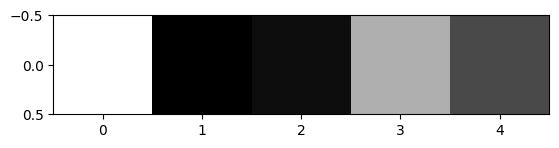

In [7]:
naive_prediction = predict(input_vector, weights_matrix)

plt.imshow(np.expand_dims(naive_prediction, 0), cmap='gray')

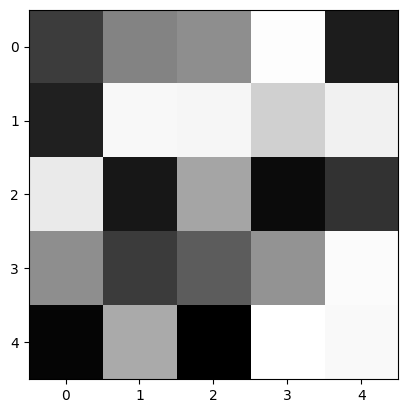

In [8]:
plt.imshow(weights_matrix, cmap="gray")

# Training!

In [9]:
lr = 0.003
epochs = 10**6

for iter in range(epochs):
    #prediction = predict(input_vector, weights_matrix)
    
    for column in range(len(ground_truth)):
        t_pj = ground_truth[column]
        o_pj = sigmoid(np.dot(input_vector, weights_matrix[column]))
        delta_pj = t_pj - o_pj

        for row in range(len(input_vector)):
            delta_p_w_ji = (delta_pj * input_vector[row]) * lr
            weights_matrix[row, column] += delta_p_w_ji

# Predicting... Again!

[0.99984058 0.71628155 0.71901828 0.9998259  0.73130629]


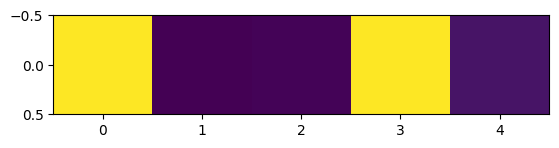

In [10]:
trained_prediction = predict(input_vector, weights_matrix)

print(trained_prediction)
plt.imshow(np.expand_dims(trained_prediction, 0))

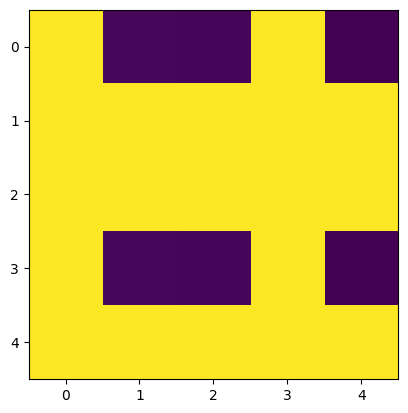

In [11]:
plt.imshow(weights_matrix)

[0.         0.71972123 0.5235364  0.         0.65700828]


/home/scratch/ipykernel_341914/1198506131.py:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


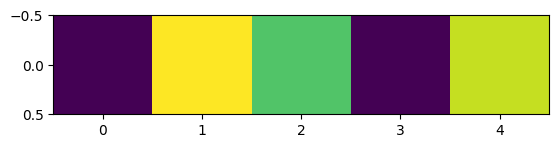

In [12]:
image2 = np.array([0, 1, 0, 0, 0])

image2_prediction = predict(image2, weights_matrix)

print(image2_prediction)
plt.imshow(np.expand_dims(image2_prediction, 0))

[0.97911799 0.53284703 0.70916037 0.98462922 0.50705882]


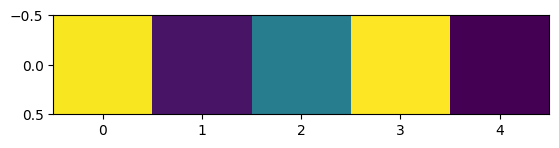

In [13]:
image2 = np.array([1, 0, 0, 0, 0])

image2_prediction = predict(image2, weights_matrix)

print(image2_prediction)
plt.imshow(np.expand_dims(image2_prediction, 0))